In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
# Generate noisy data
def generate_noisy_data(alpha, beta):
    x = np.linspace(0, 1, 101)  # x_k values
    delta = np.random.normal(0, 0.1, 101)  # Adjusted noise factor
    y = alpha * x + beta + delta
    return x, y

In [11]:
# Generate noisy data
def generate_noisy_data(alpha, beta):
    x = np.linspace(0, 1, 101)  # x_k values
    delta = np.random.normal(0, 0.1, 101)  # Adjusted noise factor
    y = alpha * x + beta + delta
    return x, y

# Linear approximant function
def linear_approximant(x, a, b):
    return a * x + b

# Rational approximant function
def rational_approximant(x, a, b):
    return a / (1 + b * x)

# Least squares function to minimize
def least_squares(params, x, y, approximant_func):
    a, b = params
    y_pred = approximant_func(x, a, b)
    return np.sum((y_pred - y) ** 2)

# Exhaustive search for parameter estimation
def exhaustive_search(approximant_func, x, y):
    result=[]
    best_loss = float('inf')
    best_params = None
    iterations = 0
    f_calculations = 0

    # Iterate through possible parameter values
    for a in np.linspace(-10, 10, 100):
        for b in np.linspace(-10, 10, 100):
            loss = least_squares([a, b], x, y, approximant_func)
            iterations+=1
            f_calculations+=1
            if loss < best_loss:
                best_loss = loss
                best_params = [a, b]
    return best_params, best_loss, iterations, f_calculations

# Gauss optimization for parameter estimation
def gauss_optimization(approximant_func, x, y):
    result = minimize(least_squares, [0, 0], args=(x, y, approximant_func), method='L-BFGS-B')
    return result.x, result.fun, result['nit'], result['nfev']

# Nelder-Mead optimization for parameter estimation
def nelder_mead_optimization(approximant_func, x, y):
    result = minimize(least_squares, [0, 0], args=(x, y, approximant_func), method='Nelder-Mead')
    return result.x, result.fun, result['nit'], result['nfev']

# Visualize data and approximants
def plot_results(x, y, approximant_func, params, title):
    plt.scatter(x, y, label='Noisy Data')
    x_values = np.linspace(0, 1, 1000)
    y_pred = approximant_func(x_values, *params)
    plt.plot(x_values, y_pred, label=f'Approximant: {title}', color='red')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.legend()

    plt.xlim(-0.1, 1.1)
    plt.ylim(np.min(y) - 0.5, np.max(y) + 0.5)

    plt.show()

In [12]:
# Generate random alpha and beta
alpha = np.random.rand()
beta = np.random.rand()

# Generate noisy data
x, y = generate_noisy_data(alpha, beta)


In [13]:
# Linear approximant
linear_params_exhaustive = exhaustive_search(linear_approximant, x, y)
print('Linear Approximant (Exhaustive):', 'iterations:',linear_params_exhaustive[2], '; f_calculations:', linear_params_exhaustive[3])

linear_params_gauss = gauss_optimization(linear_approximant, x, y)
print('Linear Approximant (Gauss):', 'iterations:',linear_params_gauss[2], '; f_calculations:', linear_params_gauss[3])

linear_params_nelder_mead = nelder_mead_optimization(linear_approximant, x, y)
print('Linear Approximant (Nelder-Mead):', 'iterations:',linear_params_nelder_mead[2], '; f_calculations:', linear_params_nelder_mead[3])

# Rational approximant
rational_params_exhaustive = exhaustive_search(rational_approximant, x, y)
print('Rational Approximant (Exhaustive):', 'iterations:',rational_params_exhaustive[2], '; f_calculations:', rational_params_exhaustive[3])

rational_params_gauss = gauss_optimization(rational_approximant, x, y)
print('Rational Approximant (Gauss):', 'iterations:',rational_params_gauss[2], '; f_calculations:', rational_params_gauss[3])

rational_params_nelder_mead = nelder_mead_optimization(rational_approximant, x, y)
print('Rational Approximant (Nelder-Mead):', 'iterations:',rational_params_nelder_mead[2], '; f_calculations:', rational_params_nelder_mead[3])

Linear Approximant (Exhaustive): iterations: 10000 ; f_calculations: 10000
Linear Approximant (Gauss): iterations: 8 ; f_calculations: 30
Linear Approximant (Nelder-Mead): iterations: 68 ; f_calculations: 128
Rational Approximant (Exhaustive): iterations: 10000 ; f_calculations: 10000
Rational Approximant (Gauss): iterations: 10 ; f_calculations: 39
Rational Approximant (Nelder-Mead): iterations: 56 ; f_calculations: 109


/tmp/ipykernel_518/242470359.py:14: RuntimeWarning: divide by zero encountered in divide
  return a / (1 + b * x)


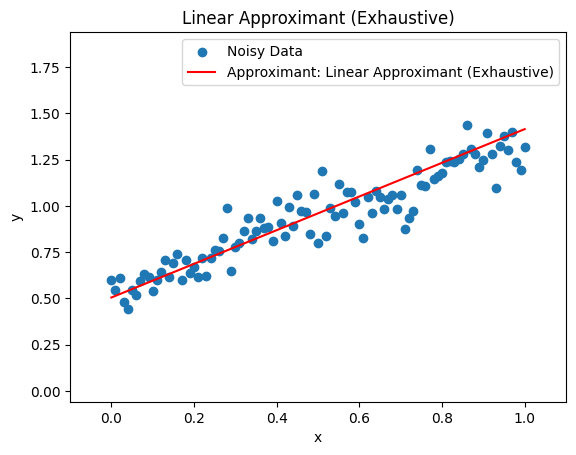

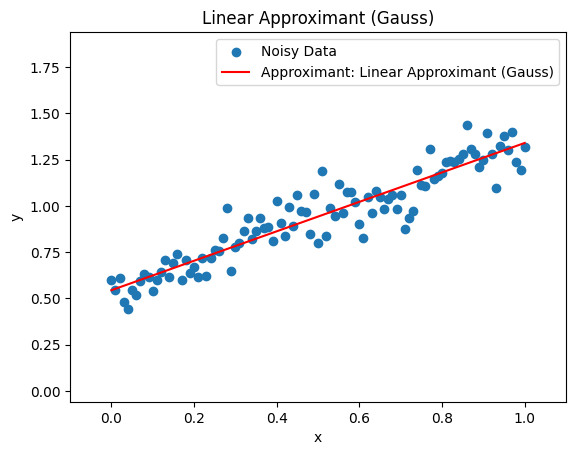

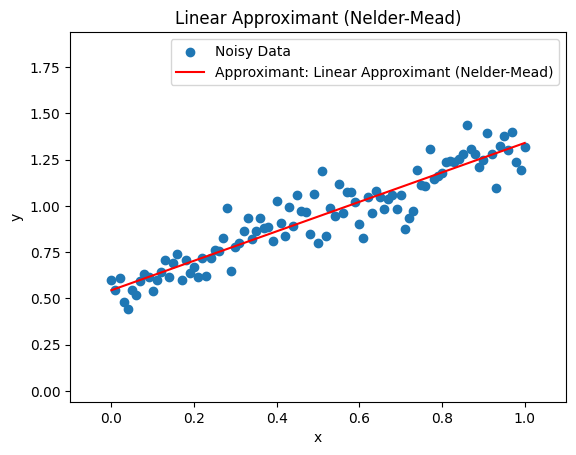

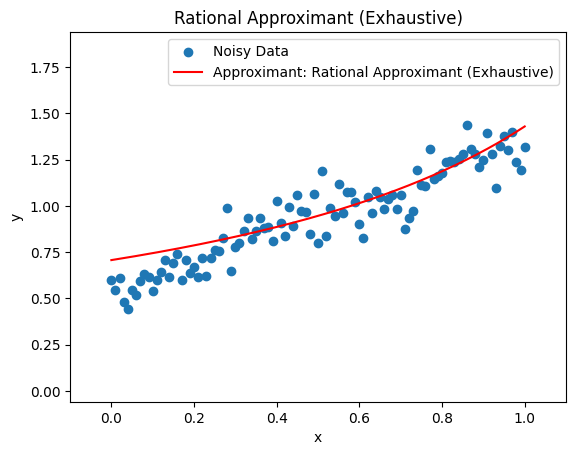

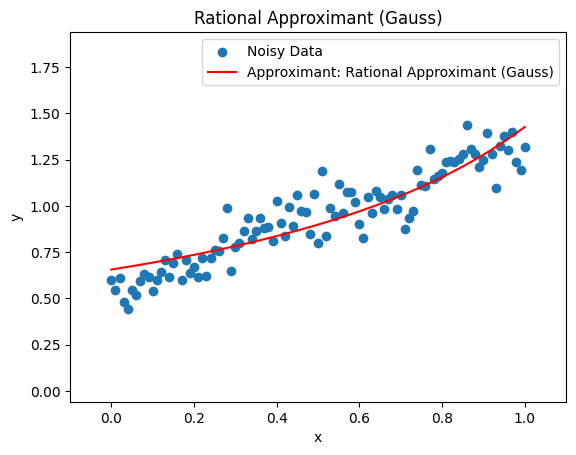

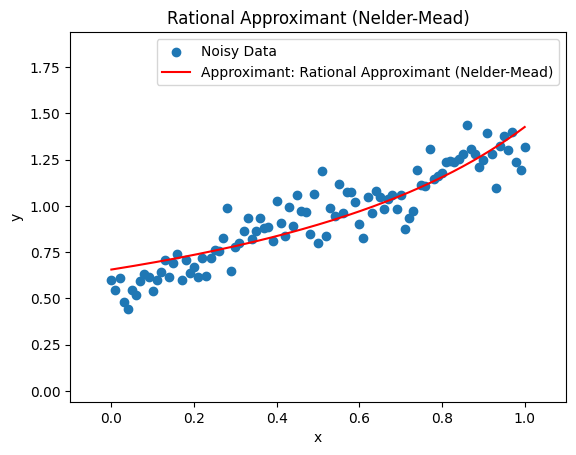

In [15]:
# Plot results for linear approximant
plot_results(x, y, linear_approximant, linear_params_exhaustive[0], 'Linear Approximant (Exhaustive)')
plot_results(x, y, linear_approximant, linear_params_gauss[0], 'Linear Approximant (Gauss)')
plot_results(x, y, linear_approximant, linear_params_nelder_mead[0], 'Linear Approximant (Nelder-Mead)')

# Plot results for rational approximant
plot_results(x, y, rational_approximant, rational_params_exhaustive[0], 'Rational Approximant (Exhaustive)')
plot_results(x, y, rational_approximant, rational_params_gauss[0], 'Rational Approximant (Gauss)')
plot_results(x, y, rational_approximant, rational_params_nelder_mead[0], 'Rational Approximant (Nelder-Mead)')

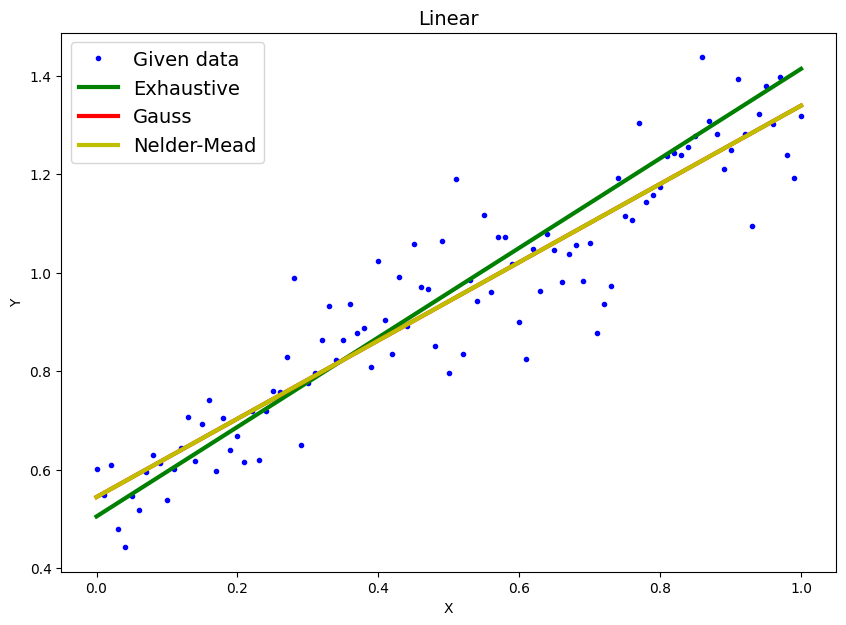

In [16]:
plt.figure(figsize=(10,7))
plt.title("Linear", fontsize=14)
plt.plot(x, y, '.b', label="Given data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(np.linspace(0, 1, 1000), linear_approximant(np.linspace(0, 1, 1000), *linear_params_exhaustive[0]), 'g', label="Exhaustive", linewidth=3)
plt.plot(np.linspace(0, 1, 1000), linear_approximant(np.linspace(0, 1, 1000), *linear_params_gauss[0]), 'r', label="Gauss", linewidth=3)
plt.plot(np.linspace(0, 1, 1000), linear_approximant(np.linspace(0, 1, 1000), *linear_params_nelder_mead[0]), 'y', label="Nelder-Mead", linewidth=3)
plt.legend(fontsize=14)

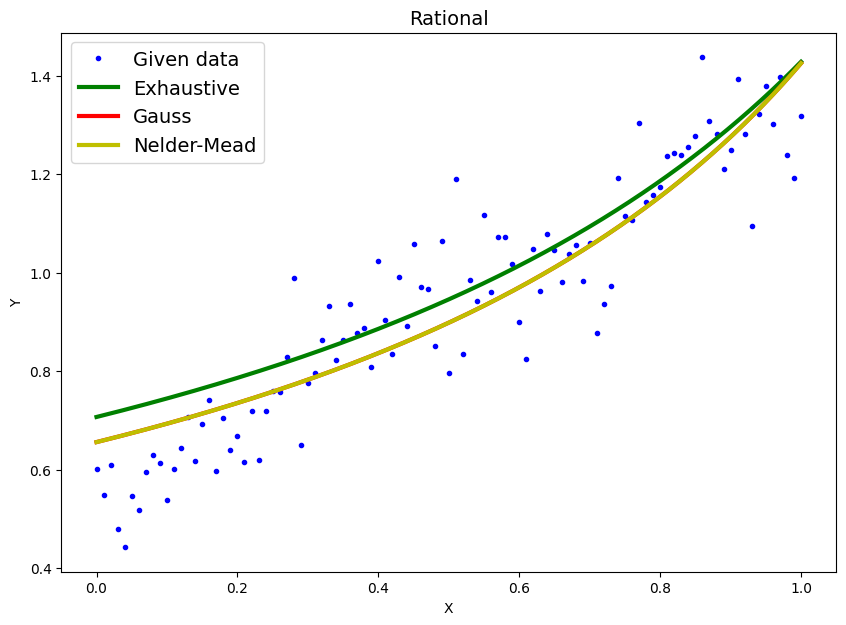

In [17]:
plt.figure(figsize=(10,7))
plt.title("Rational", fontsize=14)
plt.plot(x, y, '.b', label="Given data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(np.linspace(0, 1, 1000), rational_approximant(np.linspace(0, 1, 1000), *rational_params_exhaustive[0]), 'g', label="Exhaustive", linewidth=3)
plt.plot(np.linspace(0, 1, 1000), rational_approximant(np.linspace(0, 1, 1000), *rational_params_gauss[0]), 'r', label="Gauss", linewidth=3)
plt.plot(np.linspace(0, 1, 1000), rational_approximant(np.linspace(0, 1, 1000), *rational_params_nelder_mead[0]), 'y', label="Nelder-Mead", linewidth=3)
plt.legend(fontsize=14)